# FDA Course Homework
## Decision Tree Practice!

### import packages

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

C:\Users\Jessie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data Preprocessing
### Read data
data source link: https://www.kaggle.com/nsaravana/bank-data-set-using-decision-tree

In [2]:
pd_data = pd.read_csv ( "bank.csv" )
pd_data
# pd_data["deposit"].value_counts()
# Yes：5289　No：5873

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


## Descriptive statistics

In [3]:
pd_data[:].describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Deal with **Unknown** attributes

In [4]:
( pd_data.iloc [:,1:-1] == "unknown" ).sum()
# pd_data [ pd_data.iloc [:,1] == "unknown" ].sum()

job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
dtype: int64

## Deal with the "Yes" or "No" data：DEPOSIT, DEFAULT, HOUSING, LOAN

In [5]:
deposit_map = ( { "no" : 0, "yes" : 1 } )
pd_data ["deposit"] = pd_data ["deposit"].map ( deposit_map )
default_map = ( { "no" : 0, "yes" : 1 } )
pd_data ["default"] = pd_data ["default"].map ( default_map )
housing_map = ( { "no" : 0, "yes" : 1 } )
pd_data ["housing"] = pd_data ["housing"].map ( housing_map )
loan_map = ( { "no" : 0, "yes" : 1 } )
pd_data ["loan"] = pd_data ["loan"].map ( loan_map )

## Deal with the remaining string data：JOB, MARITAL, EDUCATION

In [6]:
job_map = {}
pd_data ["job"].unique()
for i in range ( len (pd_data ["job"].unique())):
     job_map.update ( { pd_data ["job"].unique()[i] : i }) 
pd_data["job"] = pd_data["job"].map ( job_map )
# pd_data["job"]

In [7]:
marital_map = {}
pd_data ["marital"].unique()
for i in range ( len (pd_data ["marital"].unique())):
     marital_map.update ( { pd_data ["marital"].unique()[i] : i }) 
pd_data["marital"] = pd_data["marital"].map ( marital_map )
# pd_data["marital"]

In [8]:
education_map = {}
pd_data ["education"].unique()
for i in range ( len (pd_data ["education"].unique())):
     education_map.update ( { pd_data ["education"].unique()[i] : i }) 
pd_data["education"] = pd_data["education"].map ( education_map )
# pd_data["education"]

## Heatmap
### To see which variable might be more useful

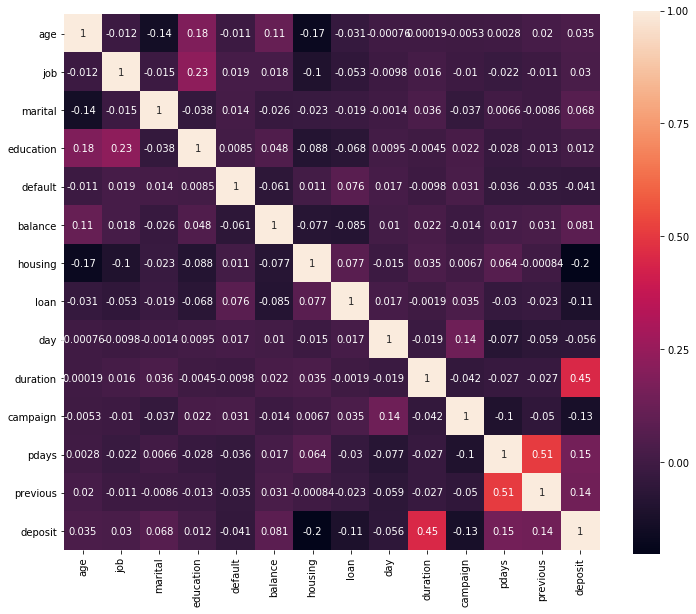

In [9]:
plt.figure ( figsize = ( 12, 10 ) )
foo = sns.heatmap ( pd_data.corr(), square = True, annot = True)

## Drop relatively useless attributes
### Drop whose correlation is lower than abs ( 0.1 )  

In [10]:
pd_data = pd_data.drop ( "age", axis = 1 )
pd_data = pd_data.drop ( "job", axis = 1 )
pd_data = pd_data.drop ( "marital", axis = 1 )
pd_data = pd_data.drop ( "education", axis = 1 )
pd_data = pd_data.drop ( "default", axis = 1 )
pd_data = pd_data.drop ( "balance", axis = 1 )
pd_data = pd_data.drop ( "contact", axis = 1 )
pd_data = pd_data.drop ( "day", axis = 1 )
pd_data = pd_data.drop ( "month", axis = 1 )
pd_data = pd_data.drop ( "poutcome", axis = 1 )

pd_data

,housing,loan,duration,campaign,pdays,previous,deposit
0,1,0,1042,1,-1,0,1
1,0,0,1467,1,-1,0,1
2,1,0,1389,1,-1,0,1
3,1,0,579,1,-1,0,1
4,0,0,673,2,-1,0,1
5,1,1,562,2,-1,0,1
6,1,1,1201,1,-1,0,1
7,1,0,1030,1,-1,0,1
8,1,0,608,1,-1,0,1
9,1,0,1297,3,-1,0,1


## Seperate data into training set and testing (validation) set

In [11]:
X = ( pd_data.iloc [:,1:-1] )
y = ( pd_data.iloc [:,-1] )
train_x, test_x, train_y, test_y = train_test_split ( X, y, train_size = 0.8, random_state = 915 )
test_y

C:\Users\Jessie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


6639     0
8920     0
9413     0
2484     1
9798     0
9204     0
3281     1
10106    0
5252     1
10965    0
3964     1
7755     0
3919     1
3228     1
3158     1
2548     1
4186     1
189      1
5919     0
10462    0
8973     0
9911     0
10229    0
6240     0
9416     0
4278     1
8486     0
6029     0
1751     1
10864    0
        ..
1103     1
7116     0
9311     0
1356     1
3308     1
4582     1
6719     0
3914     1
9641     0
1679     1
1911     1
5299     0
5084     1
7091     0
292      1
3798     1
7915     0
1401     1
11036    0
7513     0
9913     0
5805     0
7413     0
10562    0
6334     0
3555     1
5950     0
8577     0
10967    0
1900     1
Name: deposit, Length: 2233, dtype: int64

## Build A Decision Tree
### With max_depth = 6

In [12]:
dtree = DecisionTreeClassifier ( max_depth = 6 )
dtree.fit ( train_x, train_y )

dot_data = StringIO()
export_graphviz ( dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list ( train_x ),
                class_names = [ "Yes", "No"],
                special_characters = True )

graph = pydotplus.graph_from_dot_data ( dot_data.getvalue() )  
graph.write_pdf ( "Decision Tree.pdf" )

True

<img src="https://imgur.com/uWYqZOH.png" width="20000px">

In [13]:
dtree.feature_importances_

array([0.02016832, 0.69032939, 0.02755093, 0.25794174, 0.00400962])

## Apply to testing data and then calculate accuracy.

In [14]:
y_predict = dtree.predict ( test_x )
( y_predict == test_y ).mean()

0.7796686072548141

## Random Forest

In [25]:
train_x, train_y = make_classification ( n_features = 5 )
clf = RandomForestClassifier ( max_depth = 6 )
clf.fit ( train_x, train_y )
RandomForestClassifier ( criterion = 'entropy', max_depth = 2, verbose = 2 )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [26]:
y_predict = clf.predict ( test_x )
( y_predict == test_y ).mean()

0.6144200626959248

## KNeighbors

In [27]:
classifier = KNeighborsRegressor ( n_neighbors = 1 )
classifier.fit ( train_x, train_y )
y_predict = classifier.predict ( test_x )
( y_predict == test_y ).mean()

0.5584415584415584

## SVR

In [28]:
classifier = SVR( C = 0.01, gamma = 0.0000000001 )
classifier.fit ( train_x, train_y )
y_predict = classifier.predict ( test_x )
for i in range ( len ( y_predict )):
    if y_predict[i] > 0.5:
        y_predict[i] = 1
    else :
        y_predict[i] = 0
( y_predict == test_y ).mean()

0.6005373936408419